<a href="https://colab.research.google.com/github/larixgomex/portfolio/blob/main/Matplotlib_Practice_MOMwk72024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One in Four Americans say it's wrong to eat Octopus

The aim of this task is to recreate the chart below:

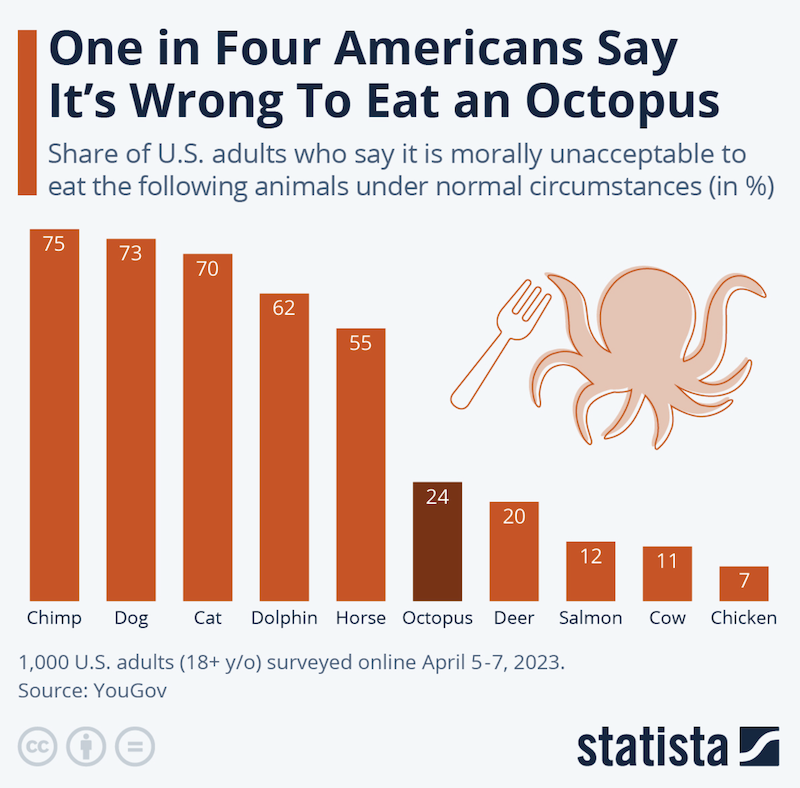

Data Source: https://data.world/makeovermonday/one-in-four-americans-say-its-wrong-to-eat-an-octopus/

## Libraries and Data

In [ ]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.image as mpimg
import matplotlib.patches as patches # add yellow rectangle
from matplotlib.patches import Rectangle
from PIL import Image
import requests
from io import BytesIO



In [ ]:
data = 'Animals_and_share _of_US_adults.xlsx'
df = pd.read_excel(data)


In [ ]:
df

,Animal,Share of U.S. Adults that say it is unacceptable to eat (%),Male,Female
0,Chimpanzee,75,68,82
1,Dog,73,67,78
2,Cat,70,62,78
3,Dolphin,62,51,74
4,Horse,55,45,63
5,Octopus,24,22,26
6,Deer,20,20,19
7,Salmon,12,16,9
8,Cow,11,12,10
9,Chicken,7,7,8


In [ ]:
# Open an image from computer
def open_image_local(path_to_image):
    image = Image.open(path_to_image) # Open the image
    image_array = np.array(image) # Convert to a numpy array
    return image_array # Output

# Open the image from my computer
image = open_image_local('/content/IMG_0083.PNG')

### Data Visualization

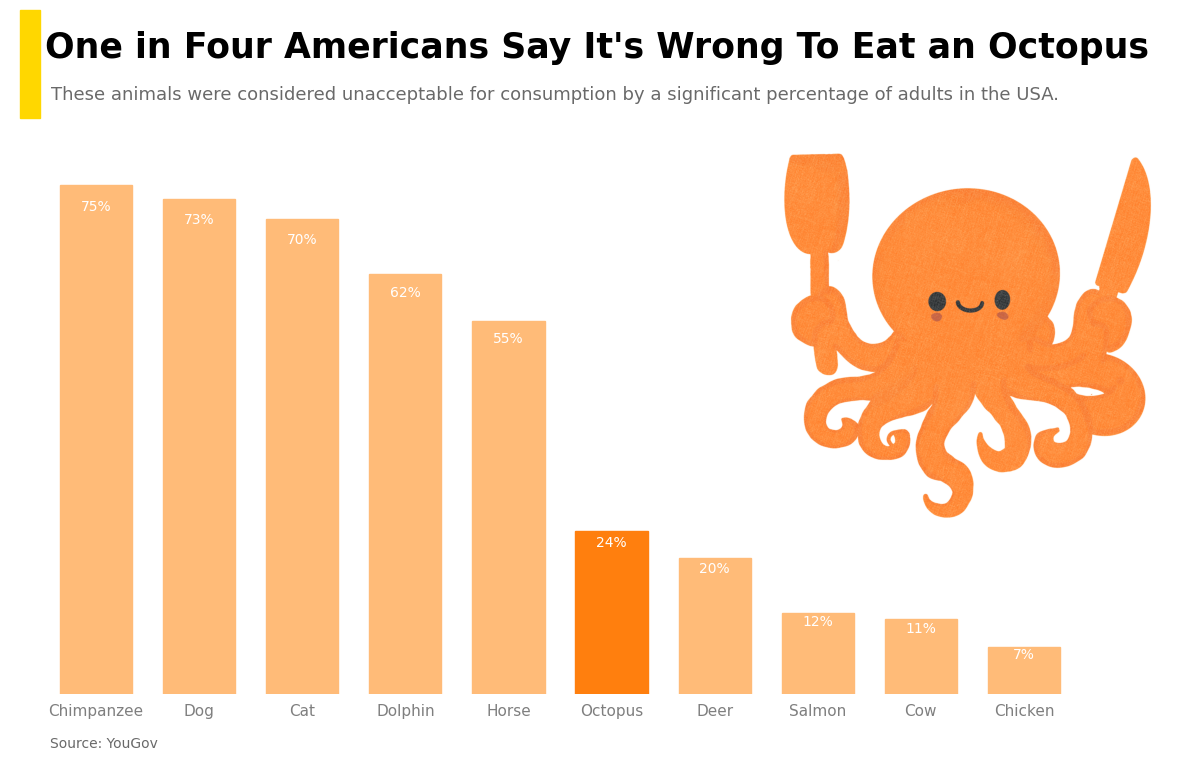

In [ ]:
animal = df['Animal']
percentage = df['Share of U.S. Adults that say it is unacceptable to eat (%)']

# Create fig
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors
laranja1 = '#ff7f0e'
laranja2 = '#ffbb78'
cinza1 = '#7f7f7f'
cinza2 = '#c7c7c7'
branco = '#ffffff'
# Ajustar a posição do gráfico dentro da figura
fig.subplots_adjust(left=-0.2, right=0.9, top=1.0)

# Create bar chart
bar_percentage = ax.bar(animal, percentage, color=laranja2, width=0.7)

# Function to format percentage
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

# Format percentage
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
# Remover grid
ax.grid(False)

# Remove y-axis
ax.yaxis.set_visible(False)
# Remover linhas das espinhas (spines)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# Remover linhas
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Axis colors
ax.spines['bottom'].set_color(cinza1)
ax.spines['left'].set_color(cinza1)

# Set y axis labels
ax.set_ylabel('Porcentagem de Adultos  (%)', color=cinza2, fontsize=12, fontweight='bold')

# Definir cor cinza dos valores do eixo x
ax.tick_params(axis='x', colors=cinza1, labelsize=11)
# Definir cor cinza dos valores do eixo y
ax.tick_params(axis='y', colors=cinza1, labelsize=12)

# Remove yticks do eixo y
ax.tick_params(bottom=False)

# Round labels
def formatar_rotulo(value):
    return f'{value:.0f}%'

# Find  "Octopus" index
octopus_index = df['Animal'].tolist().index('Octopus')
# Labels and highlighted colors
for i, rect in enumerate(bar_percentage):
    height = rect.get_height()
    valor_formatado = formatar_rotulo(height)
    if i == octopus_index:  # Destaque apenas a barra correspondente ao "Octopus"
        rect.set_color(laranja1)  # Cor destaque
    else:
        rect.set_color(laranja2)  # Cor padrão para outras barras

    # Labels
    ax.text(rect.get_x() + rect.get_width() / 2,
            height / 1.03,
            valor_formatado,
            ha='center',
            va='top',
            color=branco)


# Title
title = 'One in Four Americans Say It\'s Wrong To Eat an Octopus'
fig.text(-0.165, 1.17, title, fontsize=25, color= 'black' , fontweight='bold', ha='left', family='dejavu sans')

# Subtitle
subtitle = 'These animals were considered unacceptable for consumption by a significant percentage of adults in the USA.'
fig.text(-0.159, 1.1, subtitle, fontsize=13, color='dimgrey', ha='left', family='dejavu sans')

# Add yellow rectangle
rectangle_color = 'gold'
rect = patches.Rectangle((-0.19, 1.07), 0.02, 0.18,
                         linewidth=1, edgecolor=rectangle_color,
                         facecolor=rectangle_color, transform=fig.transFigure)
fig.patches.append(rect)

# Bottom text
source_text = 'Source: YouGov'
fig.text(-0.16, 0.02, source_text, fontsize=10, color='dimgrey', ha='left', family='dejavu sans')

# Define the position and size parameters
image_xaxis = 0.3
image_yaxis = 0.4
image_width = 0.90
image_height = 0.70  # Same as width since our logo is a square

# Define the position for the image axes
ax_image = fig.add_axes([image_xaxis,
                         image_yaxis,
                         image_width,
                         image_height]
                       )

# Display the image
ax_image.imshow(image)
ax_image.axis('off')  # Remove axis of the image

# Apresentar o gráfico
plt.show()